In [1]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

In [2]:
# Install missing packages
# install.packages(c("data.table", "mlr", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))

In [3]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

In [4]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots

# Dataset
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train



Attaching package: 'rgl'


The following object is masked from 'package:plotrix':

    mtext3d




# Assignment1

# Question 2 (p.54, Chap.2)

In [ ]:
#Question A
#Regression (CEO salary is continuous)
n = 500
p = 3


In [ ]:
#Question B
#Classification (products classed as either a success or a failure)
n = 20
p = 13

In [ ]:
#Question C
#Currency % Change
#Regression (% change in USD/Euro exchange rate is continuous)
n = 52
p = 3

# Question 10 (p.56, Chap.2)

In [40]:
#Question-a
#To begin, load in the Boston data set.The Boston data set is part of the MASS library in R. 
#How many rows are in this data set? How many columns? What do the rows and columns represent?:

library(MASS)

In [41]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [42]:
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [43]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [44]:
dim(Boston)

[1] 506  14

In [47]:
#Question-b
#Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"
Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 1 in model.matrix: no columns are assigned"


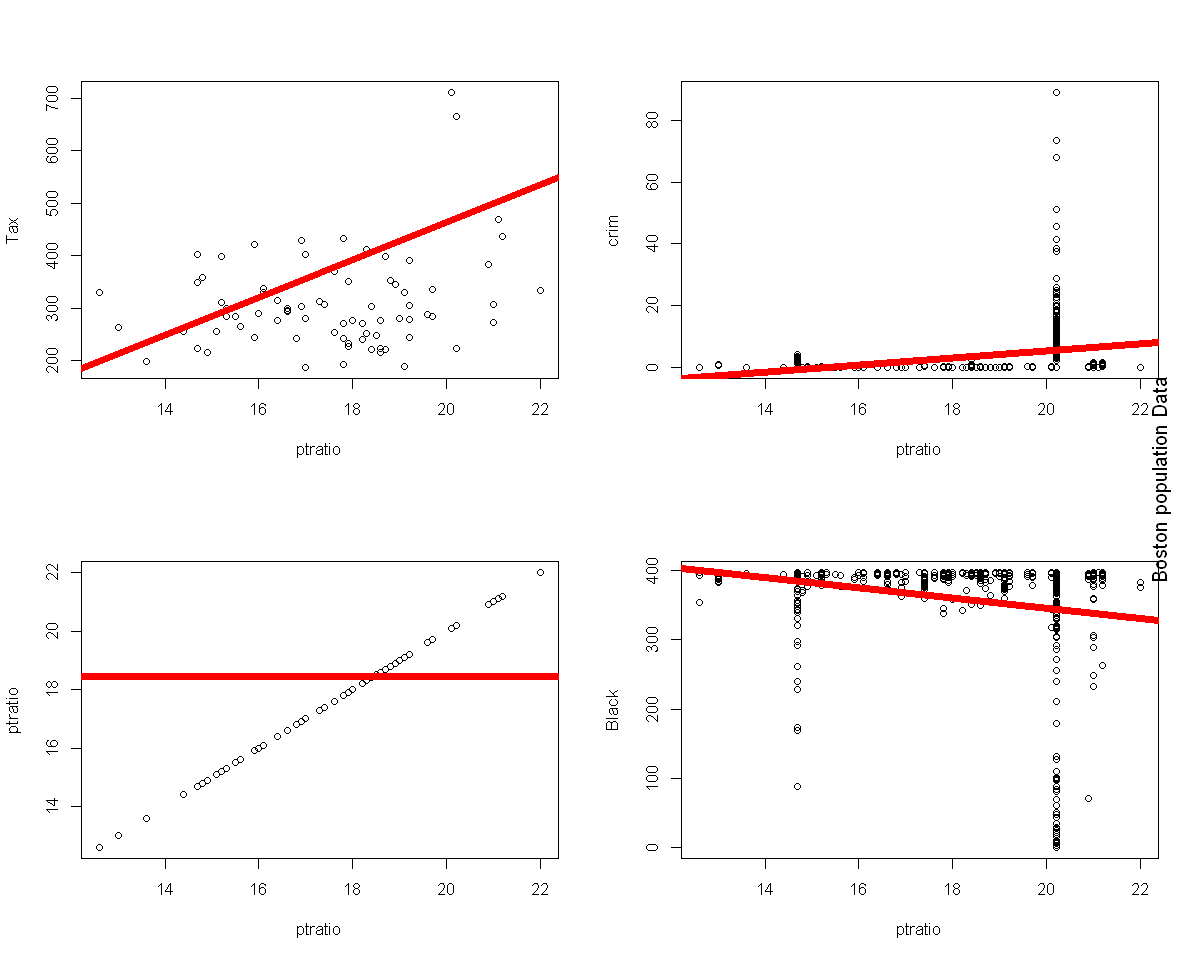

In [63]:
#Scatterplot for the predictors tax, crime, ptratio and black againist ptratio
options(repr.plot.width=10, repr.plot.height=8)  # Set plot size
par(mfrow=c(2, 2))  # Set the plot regions

plot(Boston$ptratio, Boston$tax, ylab="Tax", xlab="ptratio")
abline(lm(tax ~ ptratio, data=Boston), col='red', lwd = 6)

plot(Boston$ptratio, Boston$crim, ylab="crim", xlab="ptratio")
abline(lm(crim ~ ptratio, data=Boston), col='red',lwd = 6)

plot(Boston$ptratio, Boston$ptratio, ylab="ptratio", xlab="ptratio")
abline(lm(ptratio ~ ptratio, data=Boston), col='red',lwd = 6)

plot(Boston$ptratio, Boston$black, ylab="Black", xlab="ptratio")
abline(lm(black ~ ptratio, data=Boston), col='red',lwd = 6)

mtext("Boston population Data", side=4, line=-2.5, outer=TRUE)



As it can be seen there its linear increase increase tax with changes in independent ariable pupil-teacher ratio where was crime has slow increase withth respect to ptratio

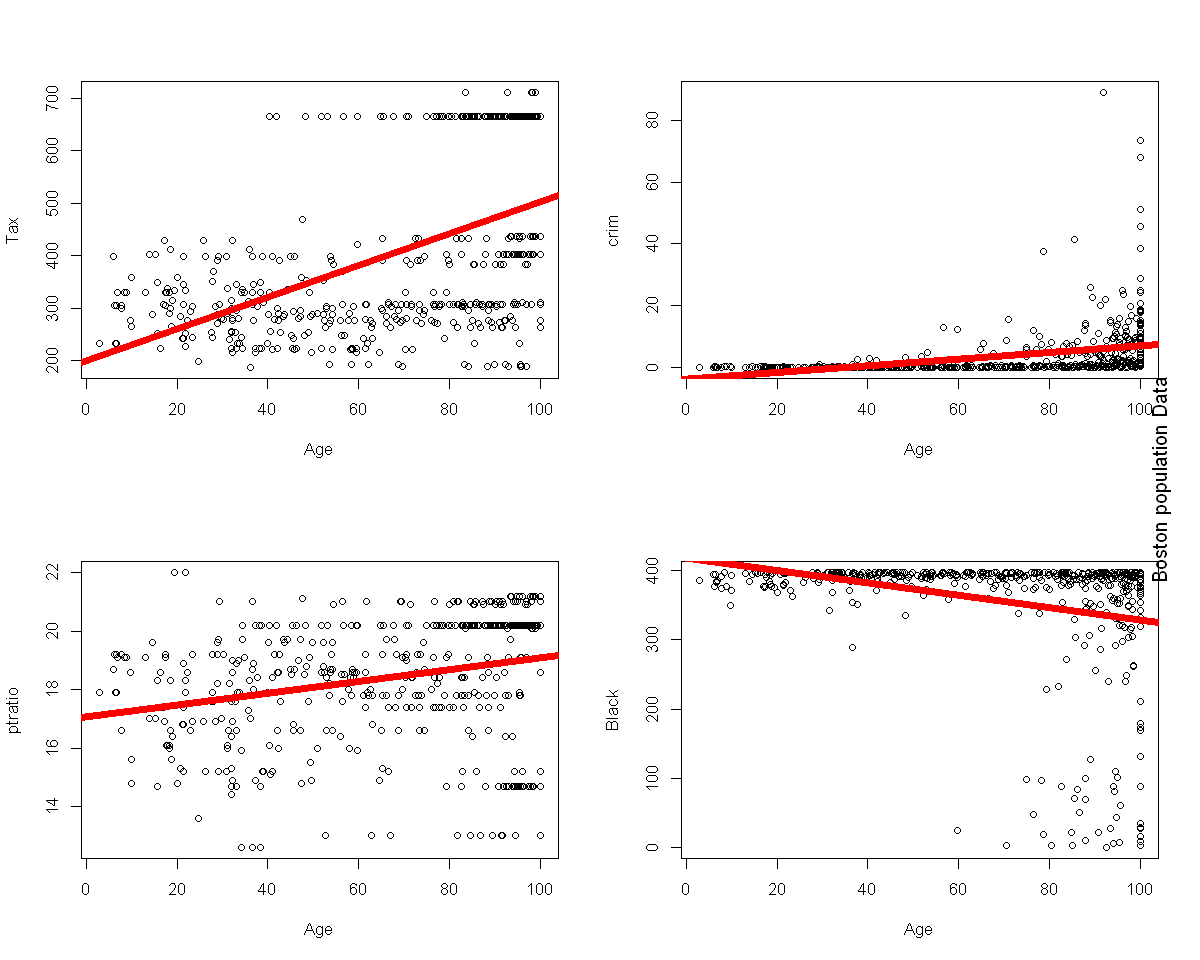

In [60]:
#Scatterplot for the predictors tax, crime, ptratio and black againist age
options(repr.plot.width=10, repr.plot.height=8)  # Set plot size
par(mfrow=c(2, 2))  # Set the plot regions

plot(Boston$age, Boston$tax, ylab="Tax", xlab="Age")
abline(lm(tax ~ age, data=Boston), col='red', lwd = 6)

plot(Boston$age, Boston$crim, ylab="crim", xlab="Age")
abline(lm(crim ~ age, data=Boston), col='red',lwd = 6)

plot(Boston$age, Boston$ptratio, ylab="ptratio", xlab="Age")
abline(lm(ptratio ~ age, data=Boston), col='red',lwd = 6)

plot(Boston$age, Boston$black, ylab="Black", xlab="Age")
abline(lm(black ~ age, data=Boston), col='red',lwd = 6)

mtext("Boston population Data", side=4, line=-2.5, outer=TRUE)


As it can be seen there its linear increase increase tax and ptratio with changes in independent ariable age ratio where was crime and black count is decreasing with age.

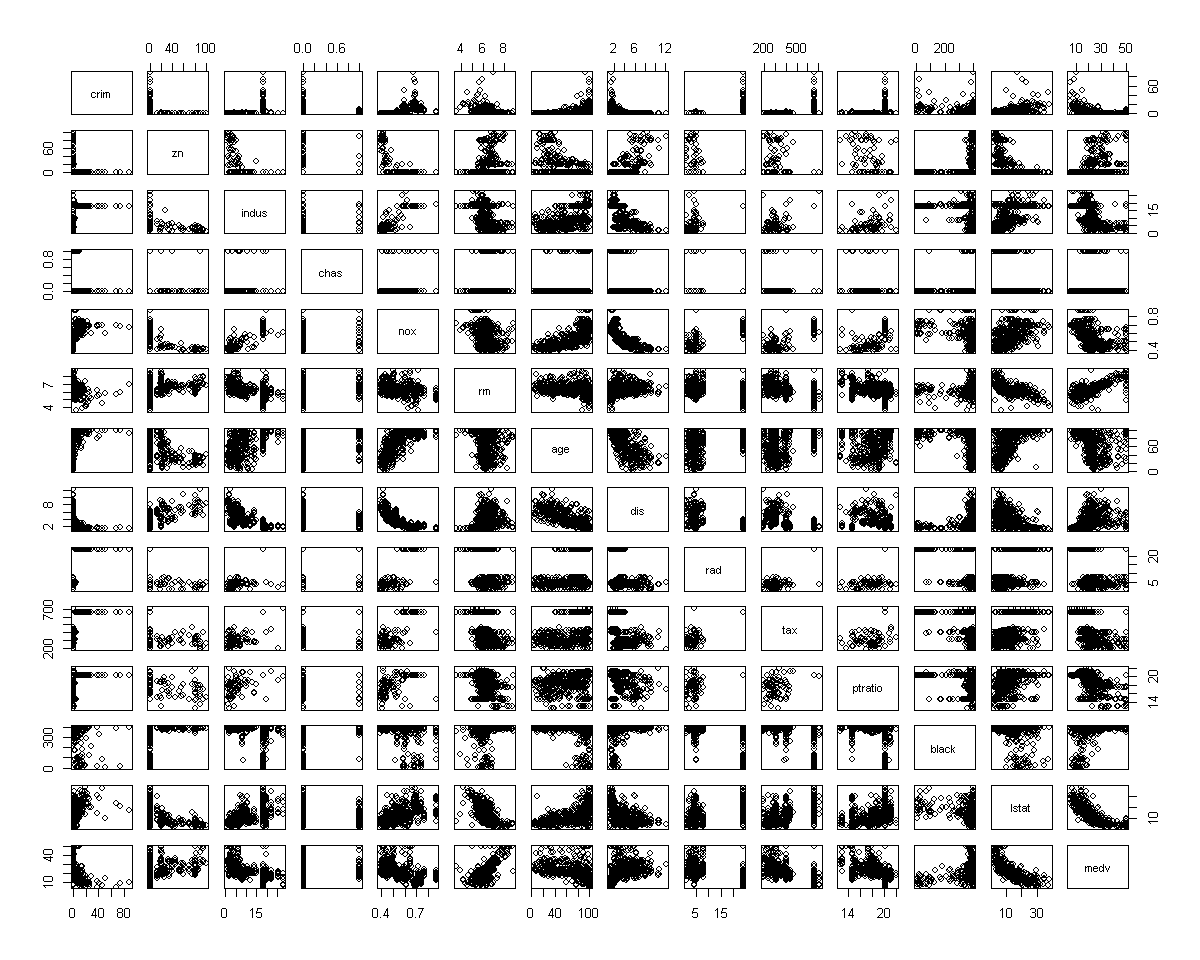

In [67]:
Boston$chas <- as.numeric(Boston$chas)
Boston$rad <- as.numeric(Boston$rad)
pairs(Boston)

from abovve some variables appear to be correlated

In [68]:
#Question-d
#Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates?
#Pupil-teacher ratios? Comment on the range of each predictor.

summary(Boston$crim)



    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

In [69]:
summary(Boston$tax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 

In [70]:
summary(Boston$ptratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

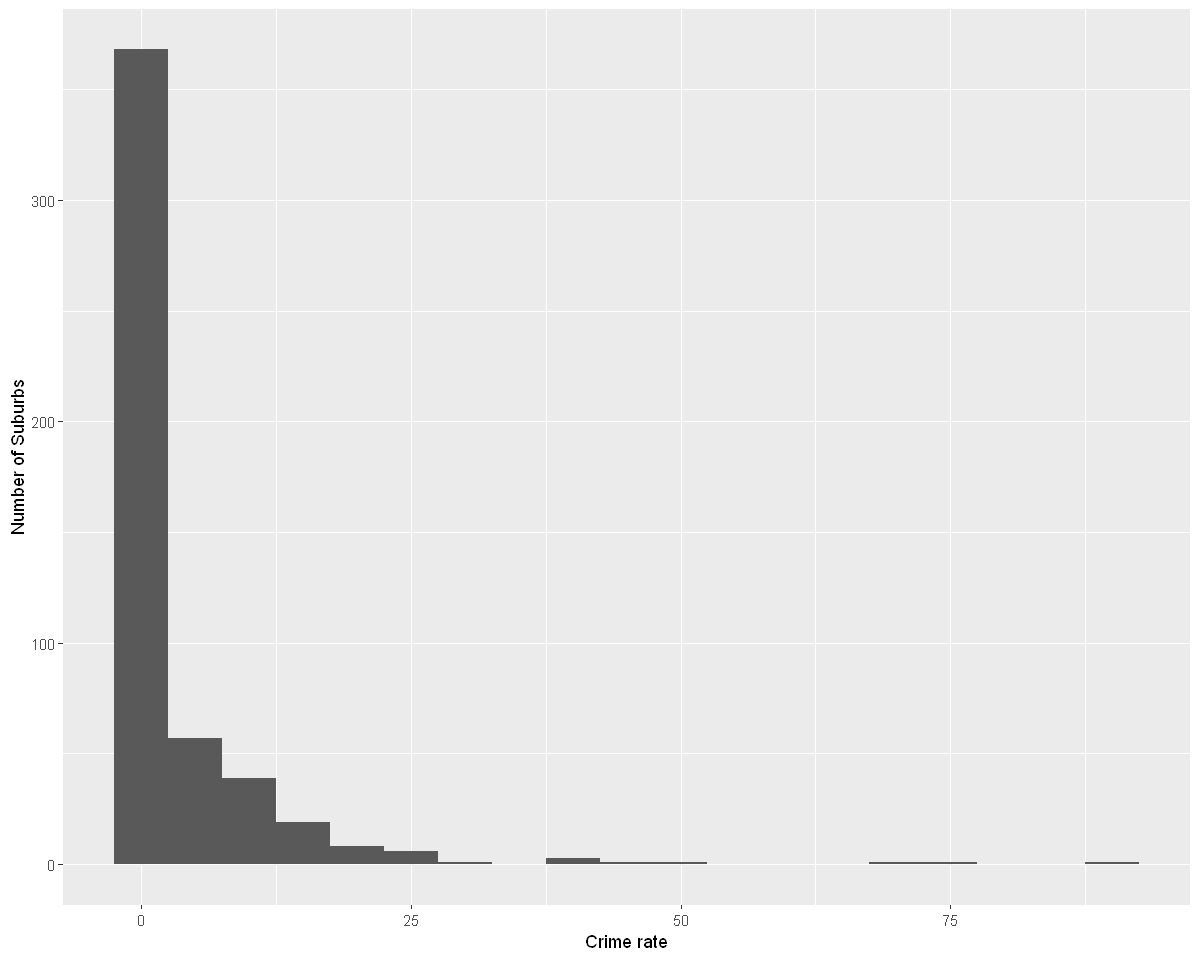

In [71]:
library(ggplot2)
qplot(Boston$crim, binwidth=5 , xlab = "Crime rate", ylab="Number of Suburbs" )

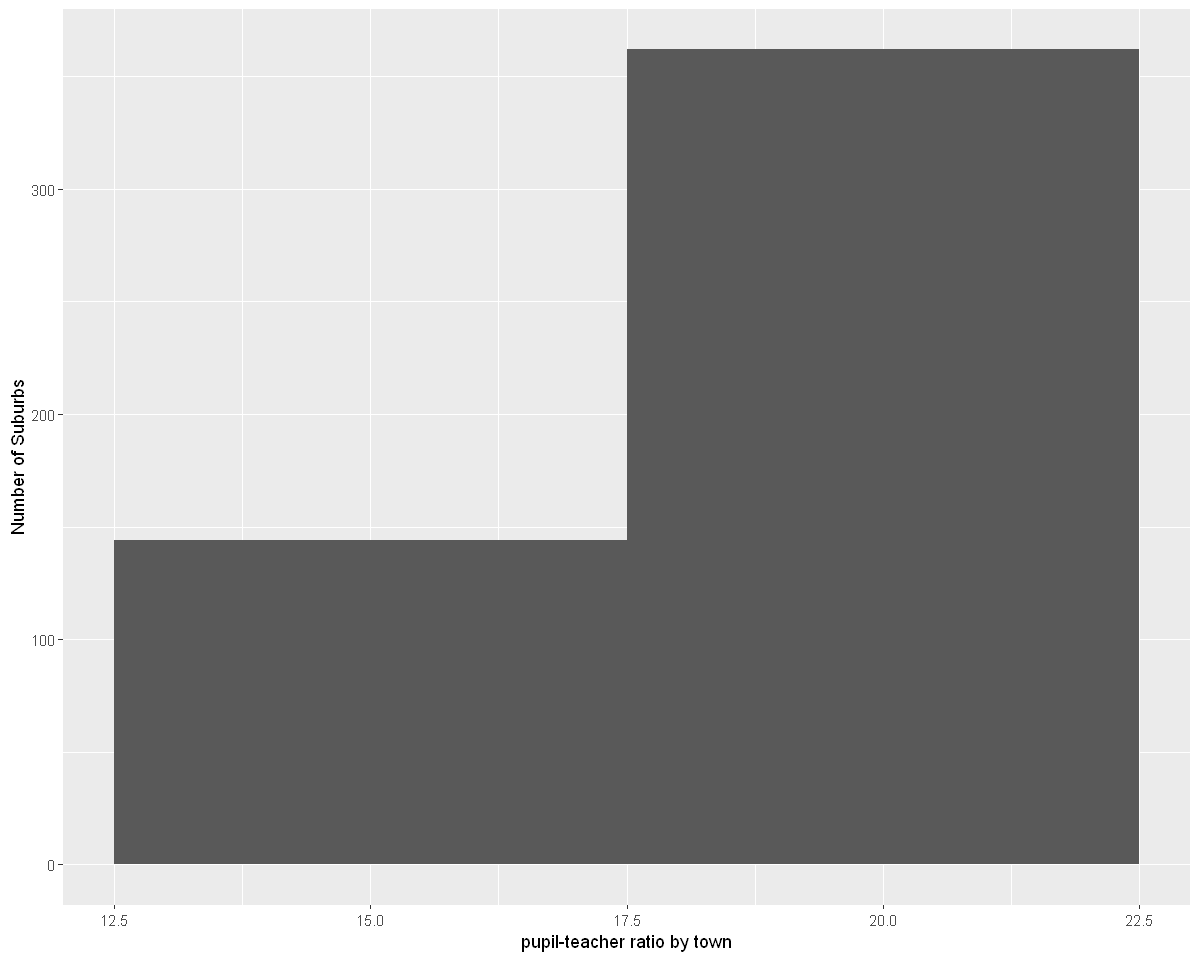

In [72]:
#pupil-teacher ratio by town
qplot(Boston$ptratio, binwidth=5, xlab ="pupil-teacher ratio by town", ylab="Number of Suburbs")

the median and maximum crime rate values are respectively about 0.26% and 89%, which means  some neighborhoods have highh crime rate

## Question 3 (p.120, Chap.3)

In [74]:
β0  = 50
β1 = 20
β2 = 0.07
β3 = 35
β4 = 0.01
β5 = -10

In [ ]:
#The regression equation is given by:

salary=β0 +β1 
gpa_gender=50+20


## Question 10 (p.123, Chap.3)

In [77]:
#Question a Fit a multiple regression model to predict Sales using Price, Urban, and US.

head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [78]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [79]:
lm.fit = lm(Sales ~ Price+Urban+US, data= Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


#Question-b
#Provide an interpretation of each coefficient in the model.
1. When price increases by $1000 and other predictors are held constant, sales decrease by 54.459 unit sales. In otherwords, when price increases by $1000, the number of carseats sold decrease by 54,459.

2. A store’s sale is not affected by whether or not it is in a Urban area.

3. A store in the US sales 1200 more carseats (in average) than a store that is abroad.

#Question-d
#For which of the predictors can you reject the null hypothesis Ho : βj = 0?

The predictor ‘Urban’. Its p-value is not significant with a value of 0.936

In [80]:
#Question-e
#On the basis of your response to the previous question, fit a smaller model that only uses
#the predictors for which there is evidence of association with the outcome.

lm.fit2 = lm(Sales ~ Price+US, data= Carseats)
summary(lm.fit2)



Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


In [81]:
#Question-g
#Using the model from (e), obtain 95 % confidence intervals for the coefficient(s)
confint(lm.fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


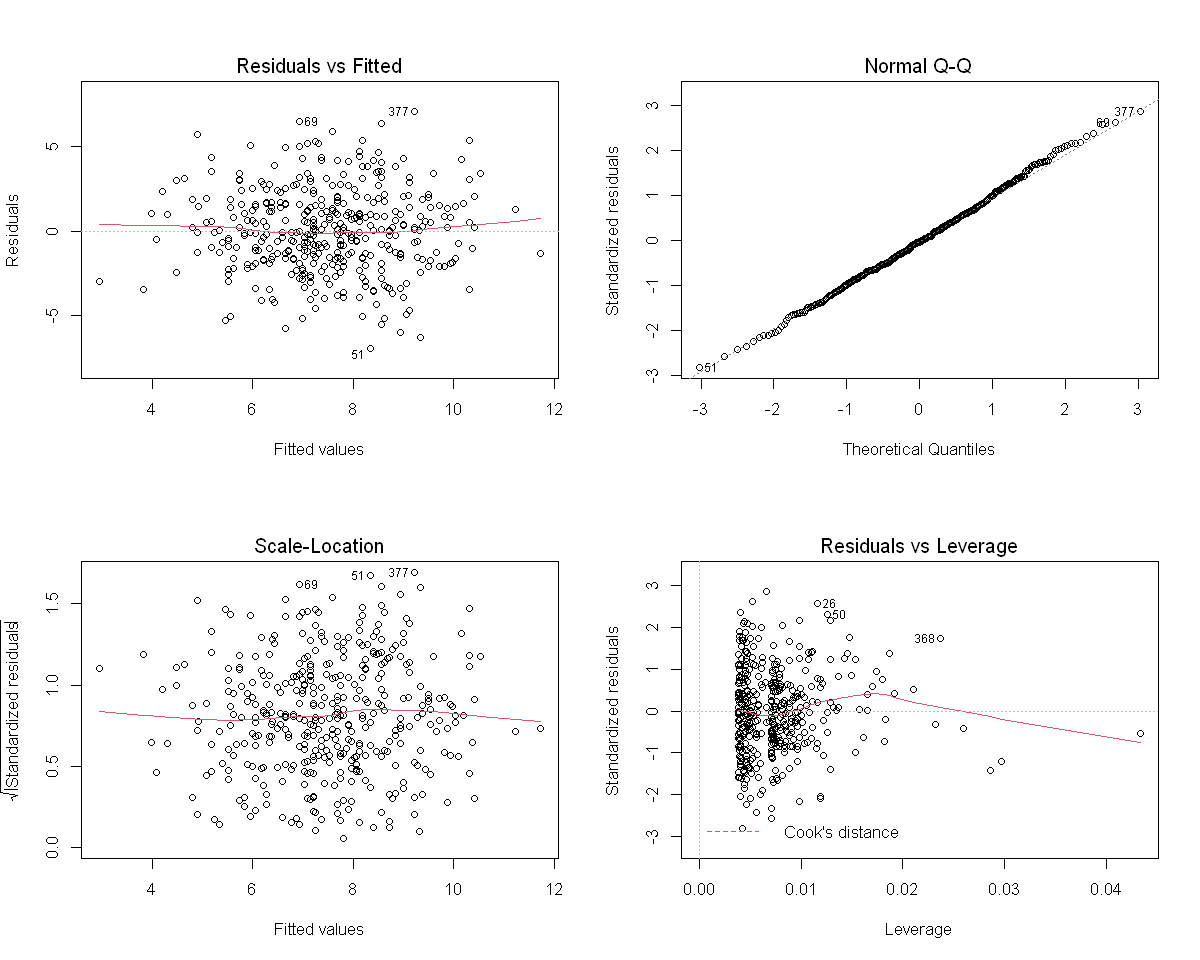

In [82]:
#Question-h
#Is there evidence of outliers or high leverage observations in the model from (e)?
par(mfrow=c(2,2))
plot(lm.fit2)